In [1]:
import cv2
import numpy as np
import os
import sklearn
import time
import matplotlib.pyplot as plt
import theano
import sys
import pickle
from keras.layers.normalization import BatchNormalization
from keras.layers.core import Dense, Dropout, Flatten
from keras.layers import ZeroPadding2D, MaxPooling2D, GlobalAveragePooling2D, Convolution2D, AveragePooling2D
from keras.layers import Input, Activation, Lambda
from keras.models import Sequential, Model, load_model
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import InceptionV3
from keras.applications.resnet50 import identity_block, conv_block
from keras.utils.layer_utils import convert_all_kernels_in_model
from keras import optimizers
from keras import backend as K

sys.path.append('..')
from lib import models
from lib import utils

WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: TITAN X (Pascal) (CNMeM is enabled with initial size: 75.0% of memory, cuDNN 5110)
Using Theano backend.


In [12]:
aligner_data_path = '/home/ryan/cs/datasets/ncfm/aligner_train.pkl'
weights = '/home/ryan/cs/datasets/ncfm/weights/vgg16.h5'
seed = 0
np.random.seed(seed)
vgg_size = (224,224)
batch_size = 2
nb_epoch = 10

In [3]:
raw = pickle.load(open(aligner_data_path, 'r'))

In [4]:
data = raw['images']
labels = raw['labels']

In [5]:
print data.shape
print labels.shape

(734, 224, 224, 3)
(734,)


In [14]:
X_train = data[:2]
y_train = labels[:2]
X_val = data[634:]
y_val = labels[634:]
X_train = np.swapaxes(X_train,1,3)
#X_train = np.swapaxes(X_train,2,3)
X_val = np.swapaxes(X_val,1,3)
#X_val = np.swapaxes(X_val,2,3)

In [15]:
print X_train.shape
print X_val.shape

(2, 3, 224, 224)
(100, 3, 224, 224)


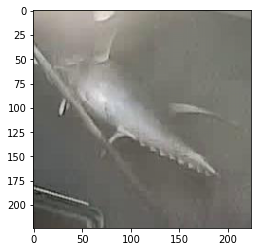

In [16]:
plt.imshow(np.swapaxes(X_train[1],0,2))
plt.show()

In [17]:
print y_train[1]

36.3230146184


In [ ]:
model = models.aligner_vgg16(weights_file = weights, size=vgg_size)

In [ ]:
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    nb_epoch=nb_epoch,
                    validation_data=(X_val, y_val),
                    shuffle=True, verbose=1)

Train on 2 samples, validate on 100 samples
Epoch 1/10
2/2 [==============================] - 0s - loss: 1037.5542 - val_loss: 2458.1127
Epoch 2/10
2/2 [==============================] - 0s - loss: 858.0828 - val_loss: 2347.2790
Epoch 3/10
2/2 [==============================] - 0s - loss: 307.6921 - val_loss: 2397.5671
Epoch 4/10
2/2 [==============================] - 0s - loss: 13.7482 - val_loss: 2786.0471
Epoch 5/10
